In [1]:
import json
import numpy as np
import utils

In [2]:
with open("data/coefficients.json") as f:
    coefficients = json.load(f)
coeffs = np.array(coefficients["coeffs"])
r2s = np.array(coefficients["r2s"])
idcs = np.array(coefficients["idcs"])
scoeffs = sorted(coeffs,key=lambda p: p[0])
x,y = zip(*scoeffs)

In [3]:
point_size = 50
inset_border_size = 2

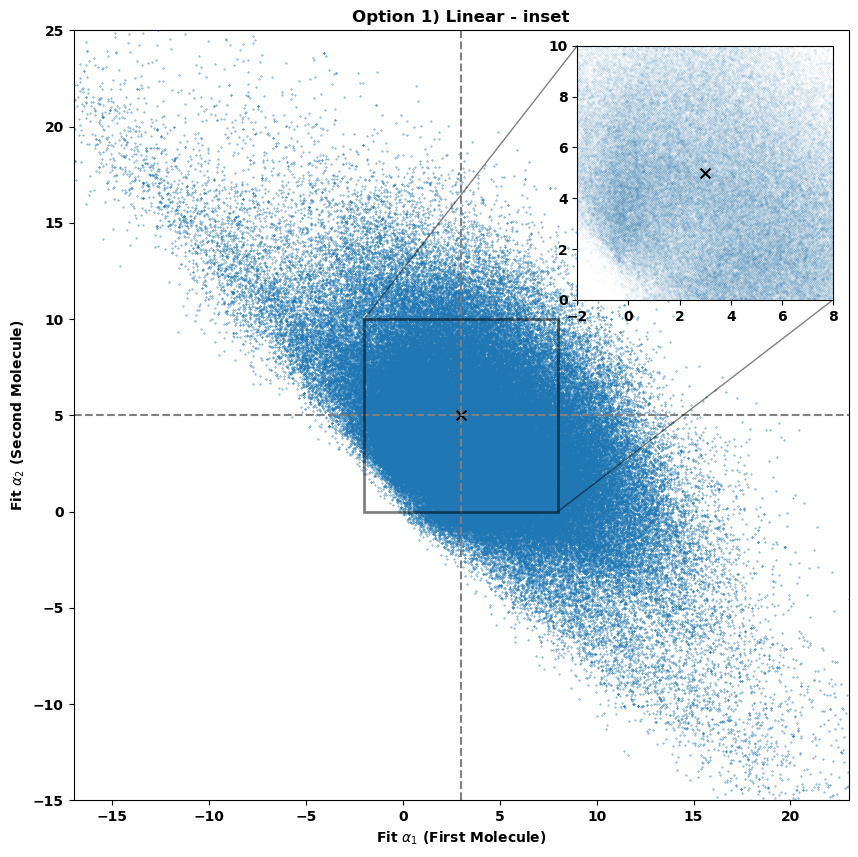

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = utils.standard_fig_ax()
ax.scatter(x,y,s=1e-1)
ax.grid()
r = 20
xm, ym = 3, 5
ax.grid(False)
# The lines are helpful for debugging the figure
ax.axhline(y=ym, color='gray', linestyle='--')
ax.axvline(x=xm, color='gray', linestyle='--')

ax.scatter(xm, ym, color='black', s=point_size, marker='x')
# ax.text(xm,ym+5, 'Mean of Fit', ha='center', va='center')

ax.set_xlim((-r+xm,r+xm))
ax.set_ylim((-r+ym,r+ym))
ax.set_xlabel(r"Fit $\alpha_1$ (First Molecule)")
ax.set_ylabel(r"Fit $\alpha_2$ (Second Molecule)")

# Create an inset axis
axins = ax.inset_axes([.65,.65,.33,.33])

# Plot the zoomed-in region on the inset axis
axins.scatter(x, y, s=1e-3)
zr = 5
axins.set_xlim(-zr+xm,zr+xm)  # Set the x-axis limits for the zoomed-in region
axins.set_ylim(-zr+ym, zr+ym)  # Set the y-axis limits for the zoomed-in region
axins.scatter(xm, ym, color='black', s=point_size, marker='x')
# Set the x-axis and y-axis to logarithmic scale


# Mark the zoomed-in region in the main plot
ax.indicate_inset_zoom(axins, edgecolor="black",lw=inset_border_size)
ax.set_title("Option 1) Linear - inset")

utils.save_figures("regressors_linear_inset",fig)
plt.show()


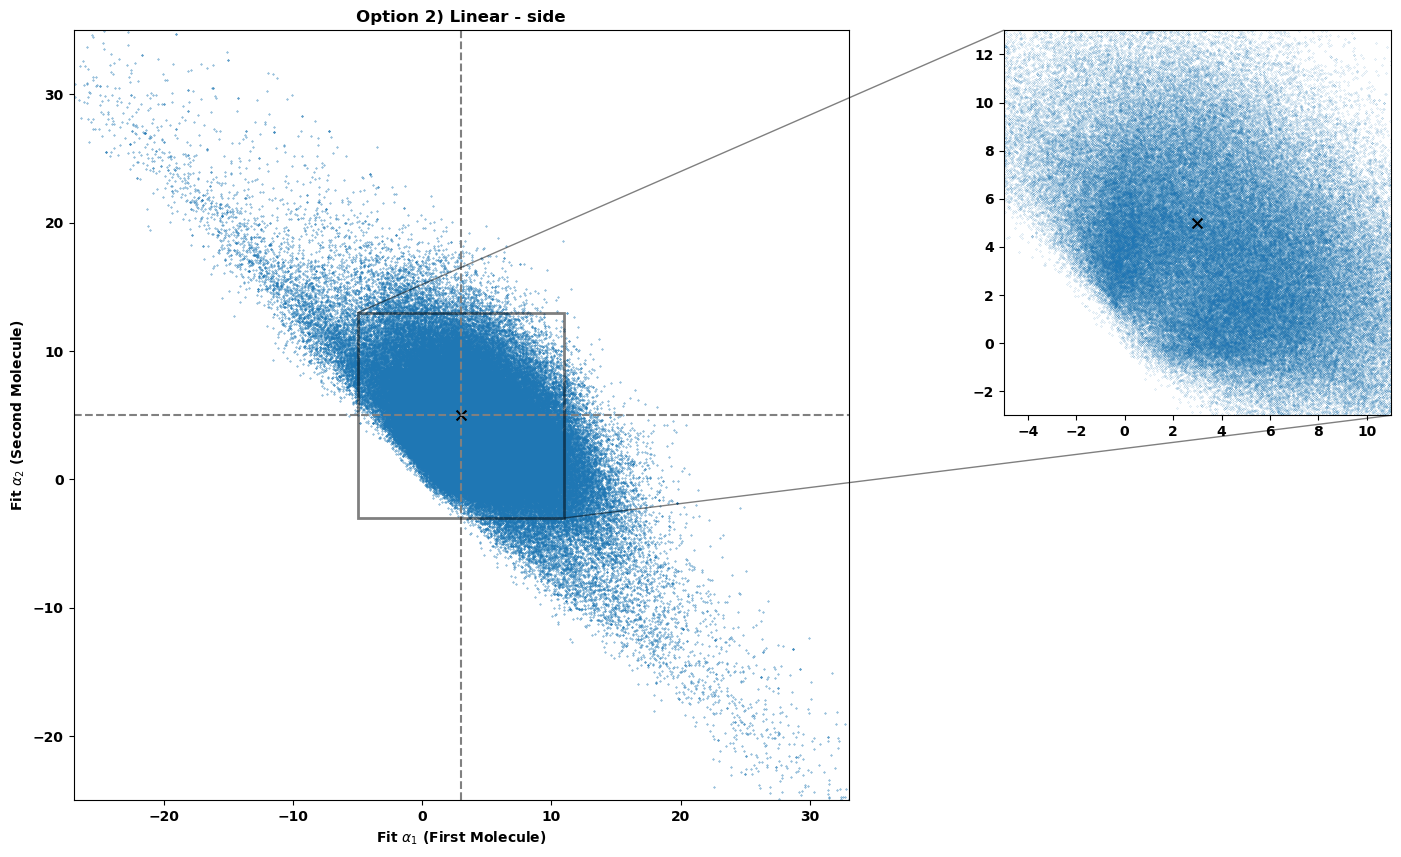

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = utils.standard_fig_ax()
ax.scatter(x,y,s=1e-1)
ax.grid()
r = 30
xm, ym = 3, 5
ax.grid(False)
# The lines are helpful for debugging the figure
ax.axhline(y=ym, color='gray', linestyle='--')
ax.axvline(x=xm, color='gray', linestyle='--')

ax.scatter(xm, ym, color='black', s=point_size, marker='x')
# ax.text(xm,ym+5, 'Mean of Fit', ha='center', va='center')

ax.set_xlim((-r+xm,r+xm))
ax.set_ylim((-r+ym,r+ym))
ax.set_xlabel(r"Fit $\alpha_1$ (First Molecule)")
ax.set_ylabel(r"Fit $\alpha_2$ (Second Molecule)")

# Create an inset axis
axins = ax.inset_axes([1.2,.5,.5,.5])

# Plot the zoomed-in region on the inset axis
axins.scatter(x, y, s=1e-2)
zr = 8
axins.set_xlim(-zr+xm,zr+xm)  # Set the x-axis limits for the zoomed-in region
axins.set_ylim(-zr+ym, zr+ym)  # Set the y-axis limits for the zoomed-in region
axins.scatter(xm, ym, color='black', s=point_size, marker='x')
# Set the x-axis and y-axis to logarithmic scale


# Mark the zoomed-in region in the main plot
ax.indicate_inset_zoom(axins, edgecolor="black",lw=inset_border_size)
ax.set_title("Option 2) Linear - side")

utils.save_figures("regressors_linear_side",fig)
plt.show()


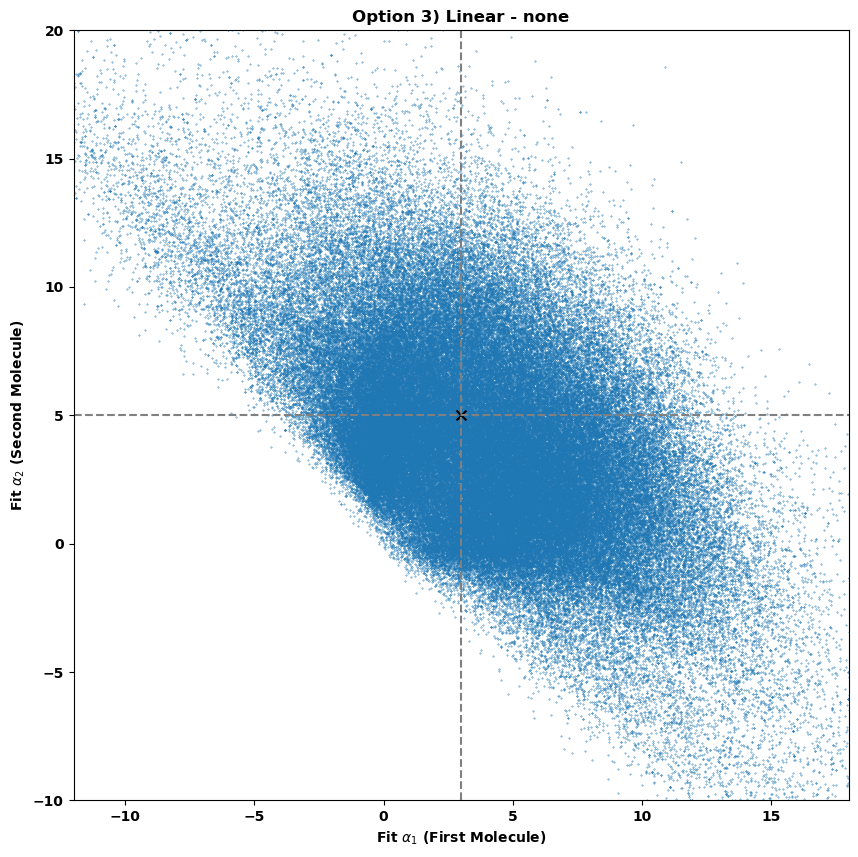

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = utils.standard_fig_ax()
ax.scatter(x,y,s=1e-1)
ax.grid()
r = 15
xm, ym = 3, 5
ax.grid(False)
# The lines are helpful for debugging the figure
ax.axhline(y=ym, color='gray', linestyle='--')
ax.axvline(x=xm, color='gray', linestyle='--')

ax.scatter(xm, ym, color='black', s=point_size, marker='x')
# ax.text(xm,ym+5, 'Mean of Fit', ha='center', va='center')

ax.set_xlim((-r+xm,r+xm))
ax.set_ylim((-r+ym,r+ym))
ax.set_xlabel(r"Fit $\alpha_1$ (First Molecule)")
ax.set_ylabel(r"Fit $\alpha_2$ (Second Molecule)")

ax.set_title("Option 3) Linear - none")

utils.save_figures("regressors_linear_none",fig)
plt.show()


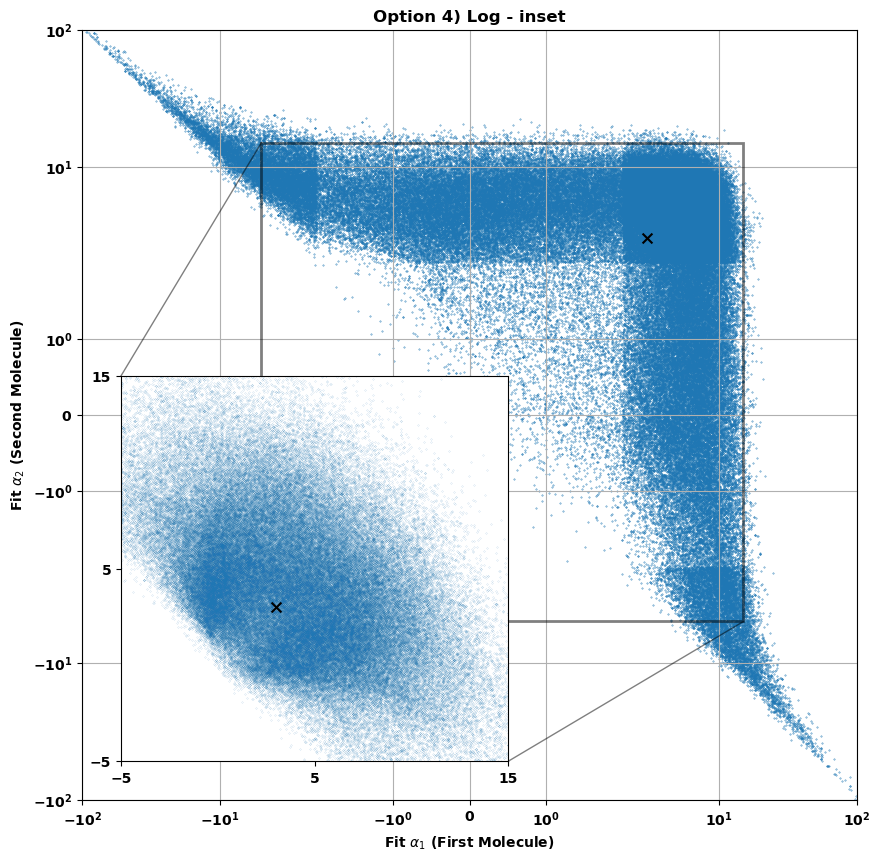

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = utils.standard_fig_ax()
ax.scatter(x,y,s=1e-1)
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.grid()
# r = 100
# ax.grid(False)
# The lines are helpful for debugging the figure

ax.scatter(3, 3, color='black', s=point_size, marker='x')
# ax.text(xm,ym+5, 'Mean of Fit', ha='center', va='center')

r = 1e2
ax.set_xlim((-r,r))
ax.set_ylim((-r,r))
ax.set_xlabel(r"Fit $\alpha_1$ (First Molecule)")
ax.set_ylabel(r"Fit $\alpha_2$ (Second Molecule)")

# Create an inset axis# Specify the position of the inset axis (slightly off center)
axins = ax.inset_axes([.05,.05,.5,.5])

# Plot the zoomed-in region on the inset axis
axins.scatter(x, y, s=5e-3)
zr = 1e1
xm, ym = 5, 5
axins.set_xlim(-zr+xm,zr+xm)  # Set the x-axis limits for the zoomed-in region
axins.set_ylim(-zr+ym,zr+ym)  # Set the y-axis limits for the zoomed-in region
# Set the x-axis and y-axis to logarithmic scale
# axins.set_xscale('symlog')
# axins.set_yscale('symlog')
# Set the x and y ticks for the inset axis
# axins.set_xticks([axins.get_xlim()[0],0,xm,10, axins.get_xlim()[1]])
# axins.set_yticks([axins.get_ylim()[0],0,ym,10, axins.get_ylim()[1]])
axins.set_xticks([axins.get_xlim()[0], np.mean(axins.get_xlim()), axins.get_xlim()[1]])
axins.set_yticks([axins.get_ylim()[0], np.mean(axins.get_ylim()), axins.get_ylim()[1]])
axins.scatter(3, 3, color='black', s=point_size, marker='x')

# Mark the zoomed-in region in the main plot
ax.indicate_inset_zoom(axins, edgecolor="black",lw=inset_border_size)

ax.set_title("Option 4) Log - inset")

utils.save_figures("regressors_symlog_inset",fig)
plt.show()


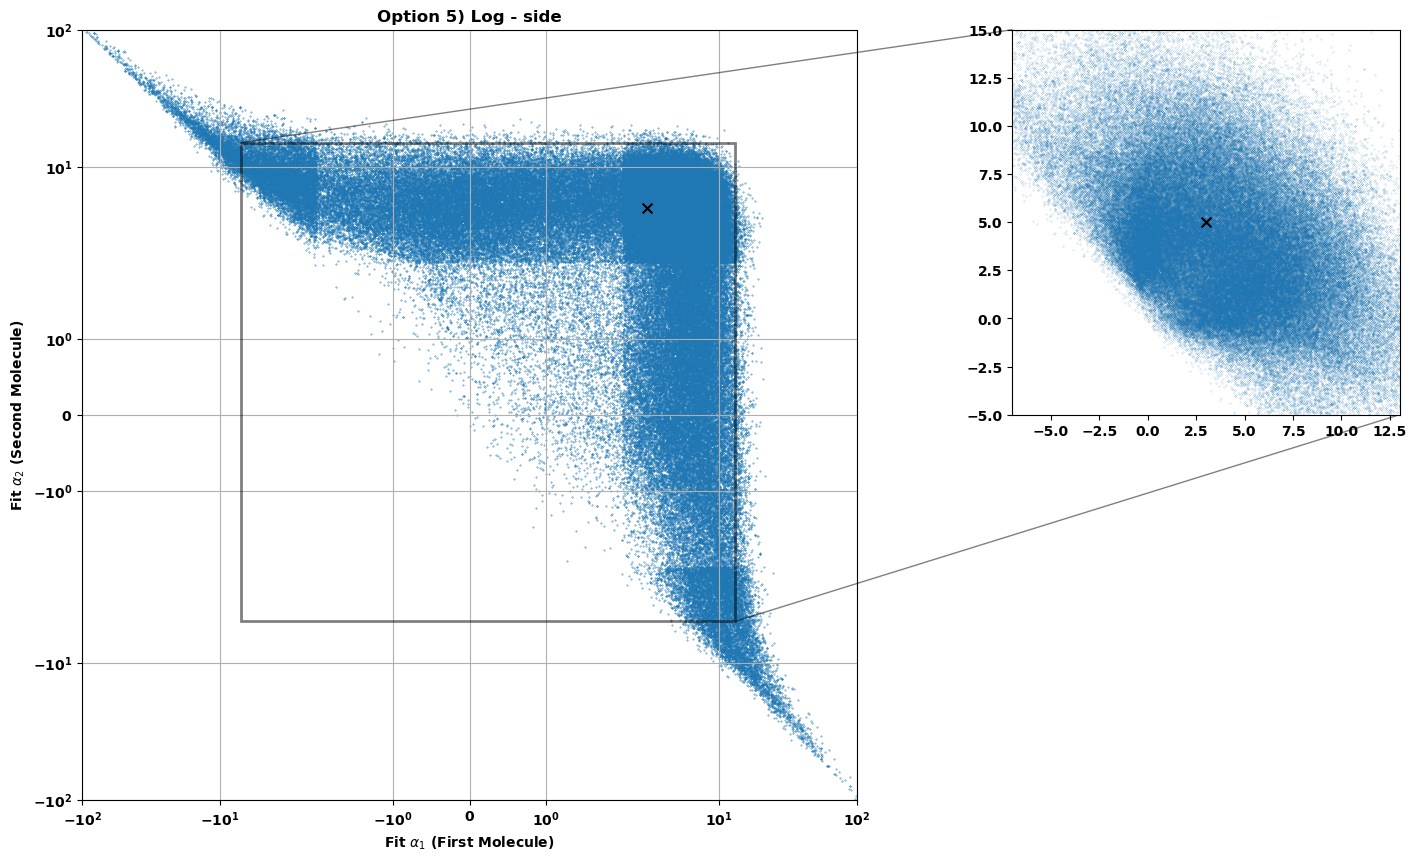

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = utils.standard_fig_ax()
ax.scatter(x,y,s=1e-1)
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.grid()
# r = 100
xm, ym = 3, 5
# ax.grid(False)
# The lines are helpful for debugging the figure

ax.scatter(xm, ym, color='black', s=point_size, marker='x')
# ax.text(xm,ym+5, 'Mean of Fit', ha='center', va='center')

r = 1e2
ax.set_xlim((-r,r))
ax.set_ylim((-r,r))
ax.set_xlabel(r"Fit $\alpha_1$ (First Molecule)")
ax.set_ylabel(r"Fit $\alpha_2$ (Second Molecule)")

# Create an inset axis# Specify the position of the inset axis (slightly off center)
axins = ax.inset_axes([1.2,.5,.5,.5])



# Plot the zoomed-in region on the inset axis
axins.scatter(x, y, s=1e-2)
zr = 1e1
axins.set_xlim(-zr+xm,zr+xm)  # Set the x-axis limits for the zoomed-in region
axins.set_ylim(-zr+ym, zr+ym)  # Set the y-axis limits for the zoomed-in region
axins.scatter(xm, ym, color='black', s=point_size, marker='x')
# Set the x-axis and y-axis to logarithmic scale
# axins.set_xscale('symlog')
# axins.set_yscale('symlog')
# axins.set_xticks([])
# axins.set_yticks([])

# Mark the zoomed-in region in the main plot
ax.indicate_inset_zoom(axins, edgecolor="black",lw=inset_border_size)

ax.set_title("Option 5) Log - side")

utils.save_figures("regressors_symlog_side",fig)
plt.show()


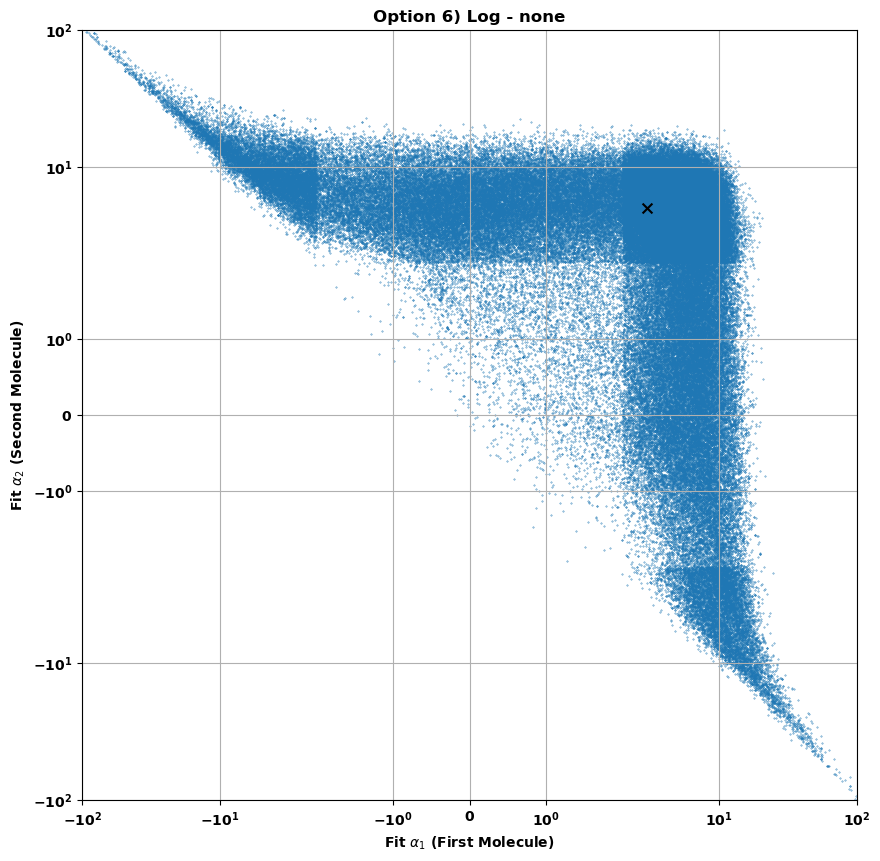

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = utils.standard_fig_ax()
ax.scatter(x,y,s=1e-1)
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.grid()
# r = 100
# xm, ym = 3, 5
# ax.grid(False)
# The lines are helpful for debugging the figure

ax.scatter(xm, ym, color='black', s=point_size, marker='x')
# ax.text(xm,ym+5, 'Mean of Fit', ha='center', va='center')

r = 1e2
ax.set_xlim((-r,r))
ax.set_ylim((-r,r))
ax.set_xlabel(r"Fit $\alpha_1$ (First Molecule)")
ax.set_ylabel(r"Fit $\alpha_2$ (Second Molecule)")
ax.set_title("Option 6) Log - none")

utils.save_figures("regressors_symlog_none",fig)
plt.show()
